# **Dataset Background**
# Dummy Marketing and Sales Data to Predict Sales
# Source: https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data
# Dataset Contains More than 4,500 Marketing Campaigns that Leverage
# Different Marketing Modalities and Varying Ratios
# And Shows Sales Output

# **Install and Import Neccessary Libraries**

In [2]:
!pip install pandas shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install mlflow --quiet

In [4]:
!pip install pyngrok --quiet

In [5]:
!pip install pycaret==2.3.10 markupsafe==2.0.1 pyyaml==5.4.1 -qq

In [6]:
!pip install Jinja2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
import seaborn as sns
import plotly.express as px
import pycaret.classification
from pycaret.regression import *
from pycaret.regression import load_model
import mlflow
from pyngrok import ngrok
from getpass import getpass
%matplotlib inline
sns.set()

# **Load Data w/ Kaggle API**

In [8]:
#Load CSV File into the Google Colab Environment
from google.colab import files
upload = files.upload()

Saving Dummy Data HSS.csv to Dummy Data HSS (1).csv


# **Define Dataframe**

In [9]:
df_marketing = pd.read_csv('Dummy Data HSS.csv')

# **Exploratory Data Analysis**

In [10]:
#Summary of the Marketing Dataset
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [11]:
#Check Data Types of Df
df_marketing.dtypes

TV              float64
Radio           float64
Social Media    float64
Influencer       object
Sales           float64
dtype: object

In [12]:
#Shape of Dataframe
df_marketing.shape

(4572, 5)

In [17]:
#List Column Names of Dataframe
list(df_marketing.columns.values)

['TV', 'Radio', 'Social Media', 'Influencer', 'Sales']

In [18]:
#Descriptive Statistic Summary of Overall PDataframe
df_marketing.describe()

,TV,Radio,Social Media,Sales
count,4562.000000,4568.000000,4566.000000,4566.000000
mean,54.066857,18.160356,3.323956,192.466602
std,26.125054,9.676958,2.212670,93.133092
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.525957,1.527849,112.322882
50%,53.000000,17.859513,3.055565,189.231172
75%,77.000000,25.649730,4.807558,272.507922
max,100.000000,48.871161,13.981662,364.079751


In [19]:
#See the Top Ten Rows of the Dataframe
df_marketing.head(10)

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
5,29.0,9.614382,1.027163,Mega,105.889148
6,55.0,24.893811,4.273602,Micro,198.679825
7,31.0,17.355042,2.289855,Nano,108.733932
8,76.0,24.648898,7.130116,Macro,270.189400
9,13.0,0.431128,2.229423,Mega,48.280582


In [20]:
#Value Count for Influencer Categories
#Four Distinct Categories of Influencers
df_marketing['Influencer'].value_counts()

Mega     1158
Micro    1153
Nano     1139
Macro    1122
Name: Influencer, dtype: int64

# **Data Viz**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f14a6a2d290>,
      dtype=object)

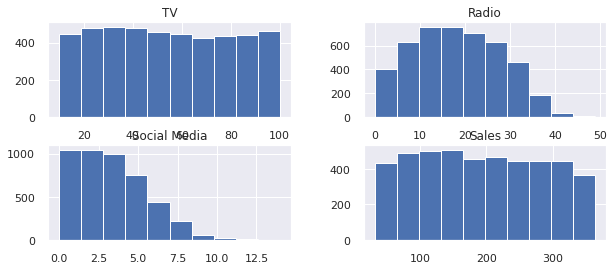

In [21]:
#Grouped Histogram of TV, Radio, Social Media and Sales Features
features = ['TV', 'Radio', 'Social Media', 'Sales']
df_marketing[features].hist(figsize=(10, 4))

In [22]:
#Individual Histogram: TV
fig = px.histogram(df_marketing, x="TV")
fig.show()

In [23]:
#Individual Histogram: Radio
fig = px.histogram(df_marketing, x="Radio")
fig.show()

In [24]:
#Individual Histogram: Social Media
fig = px.histogram(df_marketing, x="Social Media")
fig.show()

In [25]:
#Individual Histogram: Sales
fig = px.histogram(df_marketing, x="Sales")
fig.show()

In [26]:
#Scatterplot Social Media x Sales x TV
fig = px.scatter_3d(df_marketing, x='Social Media', y='Sales', z='TV',
              color='Influencer')
fig.show()

In [27]:
#Matrix Scatterplot
fig = px.scatter_matrix(df_marketing)
fig.show()

In [28]:
#Box Plot Sales
fig = px.box(df_marketing, y="Sales")
fig.show()

# **ML Ops Data Experiment: Data Preparation**

In [29]:
#Define Category Features
cat_features = ['TV', 'Radio', 'Social Media', 'Influencer']

In [31]:
#Data Preparation
s = setup(df_marketing, target = 'Sales', transform_target = True, log_experiment = True, experiment_name = 'Sales Trends and Marketing Modalities')

,Description,Value
0,session_id,5736
1,Target,Sales
2,Original Data,"(4572, 5)"
3,Missing Values,True
4,Numeric Features,3
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(3195, 7)"


INFO:logs:Logging experiment in MLFlow
2022/08/25 19:23:00 INFO mlflow.tracking.fluent: Experiment with name 'Marketing' does not exist. Creating a new experiment.
INFO:logs:SubProcess save_model() called ==================================
INFO:logs:Initializing save_model()
INFO:logs:save_model(model=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='Sales',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy='...
                ('scal

# **ML Ops Data Experiment: Model Training and Selection**

In [32]:
#Rank Models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.9901,23.8492,4.7619,0.9972,0.0377,0.0216,0.568
lightgbm,Light Gradient Boosting Machine,2.9572,32.4615,5.5730,0.9961,0.0402,0.0211,0.170
rf,Random Forest Regressor,2.9053,33.3138,5.2326,0.9960,0.0395,0.0213,0.736
gbr,Gradient Boosting Regressor,2.7558,36.8031,5.6746,0.9956,0.0412,0.0203,0.279
knn,K Neighbors Regressor,3.1783,40.3474,6.0984,0.9952,0.0439,0.0228,0.073
dt,Decision Tree Regressor,3.6339,49.4908,6.2274,0.9941,0.0456,0.0263,0.032
en,Elastic Net,6.6841,105.1405,10.1201,0.9875,0.0943,0.0567,0.024
huber,Huber Regressor,6.5607,106.6612,10.2071,0.9874,0.0947,0.0559,0.059
lasso,Lasso Regression,6.7101,106.7873,10.2005,0.9873,0.1022,0.0611,0.027
br,Bayesian Ridge,6.9825,110.2572,10.3892,0.9869,0.0868,0.0539,0.026


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:PowerTransformedTargetRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                                max_depth=None, max_features='auto',
                                max_leaf_nodes=None, max_samples=None,
                                min_impurity_decrease=0.0,
                                min_impurity_split=None, min_samples_leaf=1,
                                min_samples_split=2,
                                min_weight_fraction_leaf=0.0, n_estimators=100,
                                n_jobs=-1, oob_score=False,
                                power_transformer_method='box-cox',
                                powe...
                                regressor=ExtraTreesRegressor(bootstrap=False,
                                                              ccp_alpha=0.0,
                                                              criterion

In [33]:
# Check the Residuals of the Trained Model
plot_model(best, plot = 'residuals_interactive')

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


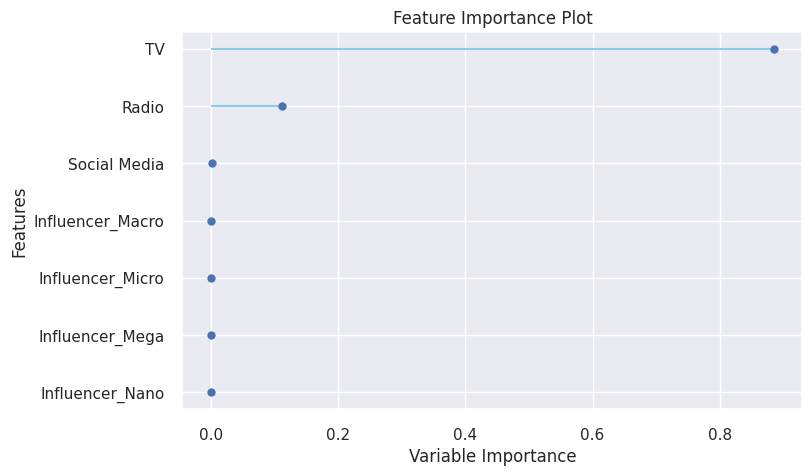

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [34]:
#Check the Feature Importance
plot_model(best, plot = 'feature')

# **Finalize and Save Pipeline**

In [35]:
# finalize the model
final_best = finalize_model(best)
# save model to disk
save_model(final_best, 'sales-marketing-pipeline')

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=PowerTransformedTargetRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                                max_depth=None, max_features='auto',
                                max_leaf_nodes=None, max_samples=None,
                                min_impurity_decrease=0.0,
                                min_impurity_split=None, min_samples_leaf=1,
                                min_samples_split=2,
                                min_weight_fraction_leaf=0.0, n_estimators=100,
                                n_jobs=-1, oob_score=False,
                                power_transformer_method='box-cox',
                                powe...
                                regressor=ExtraTreesRegressor(bootstrap=False,
                                                              ccp_alpha=0.0,
                                                              criterion='mse',
                                

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='Sales',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='...
                                                                                ccp_alpha=0.0,
                                                                                criterion='mse',
                                                                                max_depth=None,
                         

# **Deployment**

In [60]:
#Kill Any Previous ngrok sessions
ngrok.kill()

In [58]:
# Setting the authtoken (optional)
# Get your authtoken from https://dashboard.ngrok.com/auth
NGROK_AUTH_TOKEN = getpass('Enter the ngrok authtoken: ')
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Open an HTTPs tunnel on port 5000 for http://localhost:5000
ngrok_tunnel = ngrok.connect(addr="5000", proto="http", bind_tls=True)
print("MLflow Tracking UI:", ngrok_tunnel.public_url)

Enter the ngrok authtoken: ··········
MLflow Tracking UI: https://53e4-34-70-252-32.ngrok.io


In [59]:
!mlflow ui

[2022-08-25 19:41:56 +0000] [1473] [INFO] Starting gunicorn 20.1.0
[2022-08-25 19:41:56 +0000] [1473] [ERROR] Connection in use: ('127.0.0.1', 5000)
[2022-08-25 19:41:56 +0000] [1473] [ERROR] Retrying in 1 second.
[2022-08-25 19:41:57 +0000] [1473] [ERROR] Connection in use: ('127.0.0.1', 5000)
[2022-08-25 19:41:57 +0000] [1473] [ERROR] Retrying in 1 second.
[2022-08-25 19:41:58 +0000] [1473] [ERROR] Connection in use: ('127.0.0.1', 5000)
[2022-08-25 19:41:58 +0000] [1473] [ERROR] Retrying in 1 second.
[2022-08-25 19:41:59 +0000] [1473] [ERROR] Connection in use: ('127.0.0.1', 5000)
[2022-08-25 19:41:59 +0000] [1473] [ERROR] Retrying in 1 second.
[2022-08-25 19:42:00 +0000] [1473] [ERROR] Connection in use: ('127.0.0.1', 5000)
[2022-08-25 19:42:00 +0000] [1473] [ERROR] Retrying in 1 second.
[2022-08-25 19:42:01 +0000] [1473] [ERROR] Can't connect to ('127.0.0.1', 5000)
Running the mlflow server failed. Please see the logs above for details.


In [ ]:
#Kill Current ngrok Session
ngrok.kill()